In [1]:
# import pandas and numpy for data manipulation and exploratory data analysis (set up for complete view on data)
import pandas as pd
import numpy as np

# importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# importing autocorrelation plot from pandas to check for autocorrelation in Time Series
from pandas.plotting import autocorrelation_plot

# pylab, a matplotlib-based Python environment, rcParams for handling default matplotlib values
from pylab import rcParams
import statsmodels.api as sm

# importing library for Time series forecasting
import pmdarima as pm
from pmdarima.arima import ARIMA
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\const\Anaconda3\envs\ironhack\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
# Importing data
data = pd.read_excel('Call-Data.xlsx')

In [3]:
# Printing head
data.head(3)  # 1st of january 2016 = friday (53KW of 2015) , 1KW started 04.01.2016, data also for weekends

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1
0,ID0001,2016-01-01 09:12:58.000,Diane,Washing Machine,Y,Y,109.0,00:02:23.210000,3.0,False
1,ID0002,2016-01-01 09:12:57.600,Becky,Air Conditioner,Y,N,70.0,00:04:02.323000,3.0,False
2,ID0003,2016-01-01 09:47:31.200,Stewart,Washing Machine,Y,Y,10.0,00:02:11.202000,3.0,False


In [4]:
# Printing tail
data.tail(2)

,Call Id,Date,Agent,Department,Answered (Y/N),Resolved,Speed of Answer,AvgTalkDuration,Satisfaction rating,Column1
1770,ID1771,2016-01-31 17:34:04.800,Jim,Fridge,Y,Y,91.0,00:02:58.667000,3.0,False
1771,ID1772,2016-01-31 17:34:04.800,Greg,Air Conditioner,Y,Y,121.0,00:06:01.008000,2.0,False


In [5]:
# first and last call recorded
data['Date'].min(), data['Date'].max()

(Timestamp('2016-01-01 09:12:57.600000'),
 Timestamp('2016-01-31 17:34:04.800000'))

In [6]:
# create variable to drop columns
col = ['Agent','Department', 'Answered (Y/N)', 'Resolved', 'Speed of Answer', 'AvgTalkDuration', 'Satisfaction rating', 'Column1']

In [7]:
# dropping columns from data
data = data.drop(col, 1)

In [8]:
# create extra colun for weekdays
data['Weekday'] = data['Date'].dt.weekday_name

In [9]:
# Printing head
data.head(2) 

,Call Id,Date,Weekday
0,ID0001,2016-01-01 09:12:58.000,Friday
1,ID0002,2016-01-01 09:12:57.600,Friday


In [10]:
# total amount of calls per weekday in january 
total_weekday = data['Call Id'].groupby(data['Weekday']).count()

In [11]:
# Printing - default ascending, wednesday with lowest volume and saturday with highest
total_weekday.sort_values()

Weekday
Wednesday    194
Thursday     216
Tuesday      234
Friday       260
Monday       264
Sunday       286
Saturday     318
Name: Call Id, dtype: int64

In [12]:
# overview january
date = data.set_index('Date').groupby(pd.Grouper(freq='D')).count()

In [13]:
date['Weekday'] = date.index.weekday_name

In [14]:
date.head(3)

,Call Id,Weekday
Date,,
2016-01-01,58,Friday
2016-01-02,60,Saturday
2016-01-03,58,Sunday


In [57]:
date_mean = date.groupby(date['Weekday']).mean()

TypeError: sort_values() missing 1 required positional argument: 'by'

In [62]:
date_mean.sort_values('Call Id') 

,Call Id
Weekday,
Wednesday,48.5
Friday,52.0
Thursday,54.0
Sunday,57.2
Tuesday,58.5
Saturday,63.6
Monday,66.0


In [16]:
# dropping Weekday column
daily = date.drop(['Weekday'], 1)

In [52]:
# Printing Time series (data per day without weekday)
daily.head(31)

,Call Id
Date,
2016-01-01,58
2016-01-02,60
2016-01-03,58
2016-01-04,54
2016-01-05,56
2016-01-06,58
2016-01-07,54
2016-01-08,48
2016-01-09,68


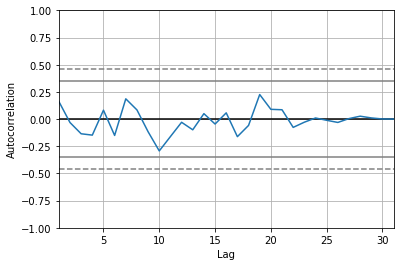

In [18]:
# Autocorrelation plots used to check for randomness in time series
autocorrelation_plot(daily)
plt.show()

# between -0.05 and 0.05 is good -> there is no correlation to itself with any lag, we can reject H0 (H0 = there is a correlation)

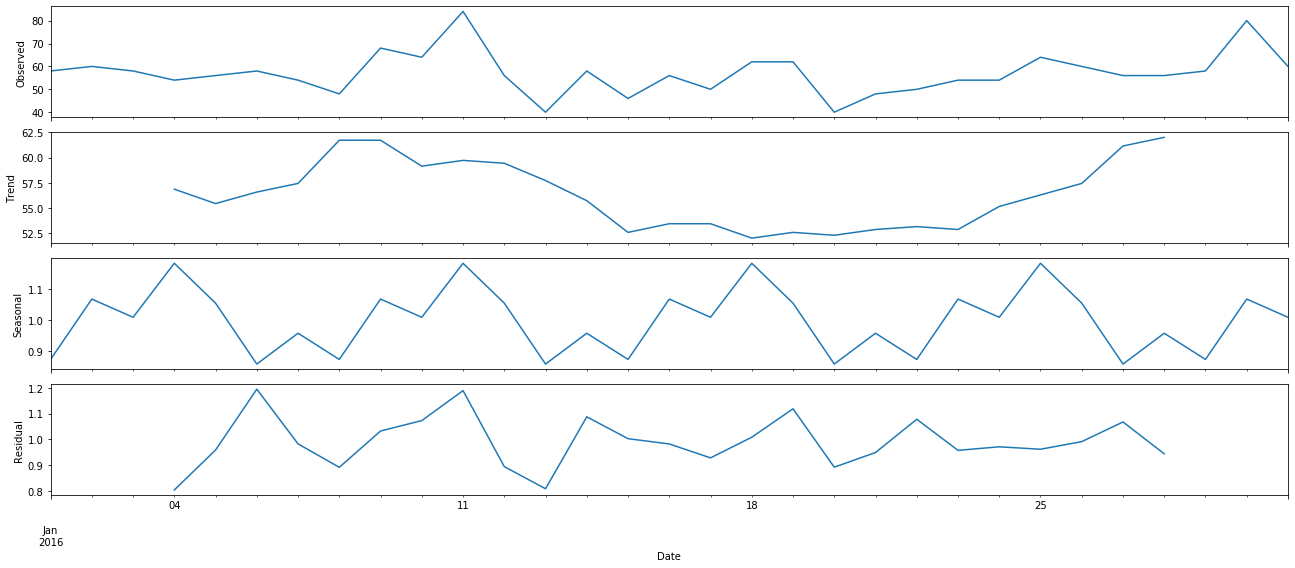

In [19]:
# Seasonality Study - Time Series Components -  increasing trend followed by a decreasing trend
# The result object provides access to the trend and seasonal series as arrays. 
#It also provides access to the residuals, which are the time series after the trend, and seasonal components are removed
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(daily, model= 'multiplicative') 
fig = decomposition.plot()
plt.show()

In [20]:
# finding the best order for the ARIMA model
# fitting a stepwise model:
stepwise_fit = pm.auto_arima(daily, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=True, d=1, D=1, trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

stepwise_fit.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=152.712, BIC=154.493, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=151.128, BIC=154.690, Fit time=0.161 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=152.676, BIC=155.348, Fit time=0.075 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=151.417, BIC=154.088, Fit time=0.120 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=152.369, BIC=156.821, Fit time=0.29

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   31
Model:             SARIMAX(0, 1, 1)x(1, 1, 0, 12)   Log Likelihood                 -70.351
Date:                            Wed, 23 Sep 2020   AIC                            148.702
Time:                                    14:15:34   BIC                            152.263
Sample:                                         0   HQIC                           149.193
                                             - 31                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.6366      2.292      0.714      0.475      -2.856       6.129
ma.L1         -0.7915      0.265     -2.984      0.003      -1.311      -0.272
ar.S.L12      -0.8374      0.252     -3.326      0.001      -1.331      -0.344
sigma2        61.2642     70.038      0.875      0.382     -76.007     198.535
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.50
Prob(Q):                               nan   Prob(JB):                         0.78
Heteroskedasticity (H):               2.35   Skew:                             0.41
Prob(H) (two-sided):                  0.32   Kurtosis:                         2.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                             ARIMA Model Results                              
Dep. Variable:              D.Call Id   No. Observations:                   30
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -110.924
Method:                       css-mle   S.D. of innovations              9.219
Date:                Wed, 23 Sep 2020   AIC                            227.848
Time:                        14:15:34   BIC                            232.051
Sample:                    01-02-2016   HQIC                           229.193
                         - 01-31-2016                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0581      0.185      0.314      0.756      -0.305       0.421
ma.L1.D.Call Id    -1.0000      0.147     -6.805      0.000      -1.288      -0.712
                                

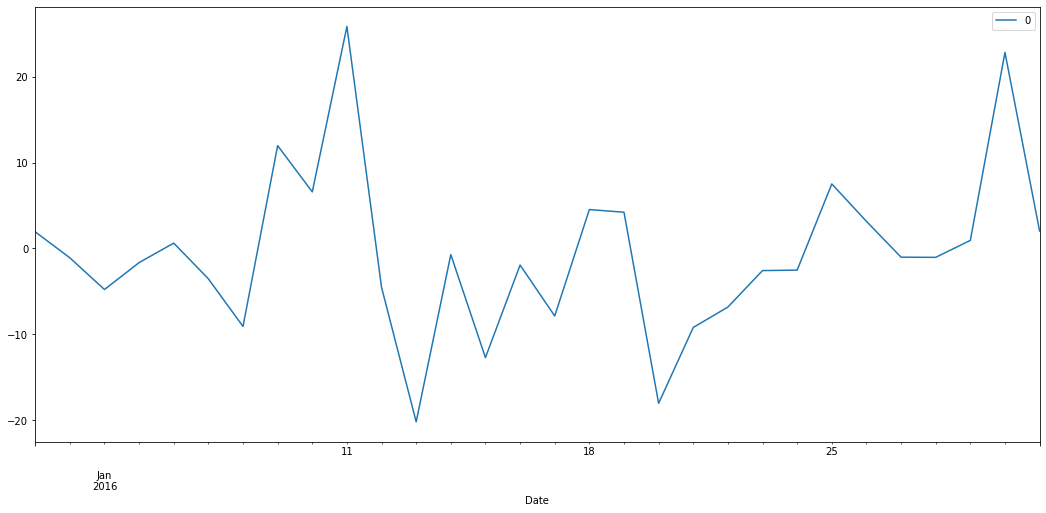

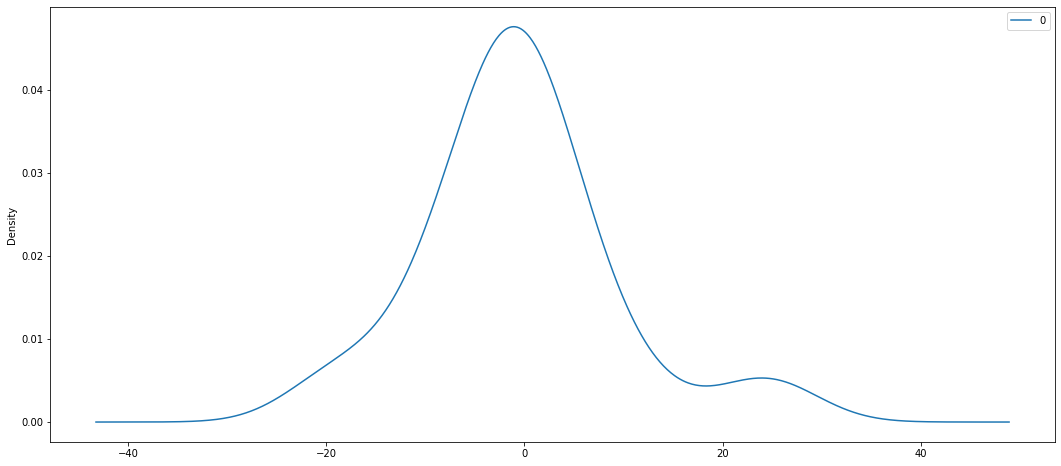

               0
count  30.000000
mean   -0.568066
std     9.711902
min   -20.210753
25%    -4.719648
50%    -1.061111
75%     2.882204
max    25.880645


In [21]:
model = ARIMA(daily, order=(0,1,1))
model_fit = model.fit(disp=0)

print(model_fit.summary())

# plot residual errors: residual of an observed value is 
# the difference between the observed value and the estimated value of the quantity of interest 
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

Test MSE: 115.273


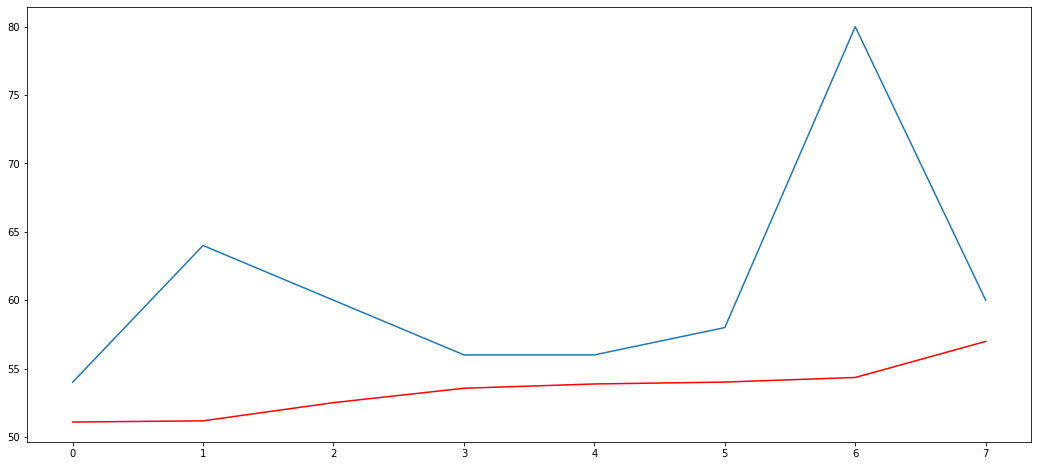

In [22]:
# Create Training- and Test-Data
X = daily.values
size = int(len(X) * 0.75)   # Split percentage

train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

for t in range(len(test)):
    model = ARIMA(history, order=(0,1,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    # print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show() 

In [23]:
# SARIMA
mod = sm.tsa.statespace.SARIMAX(daily,
                                order=( 1, 1, 2),
                                seasonal_order=(0, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1915      1.278      0.150      0.881      -2.313       2.696
ma.L1         -0.8498      1.357     -0.626      0.531      -3.509       1.810
ma.L2         -0.0074      0.765     -0.010      0.992      -1.506       1.491
ma.S.L4       -1.0000   7213.609     -0.000      1.000   -1.41e+04    1.41e+04
sigma2        95.2907   6.87e+05      0.000      1.000   -1.35e+06    1.35e+06


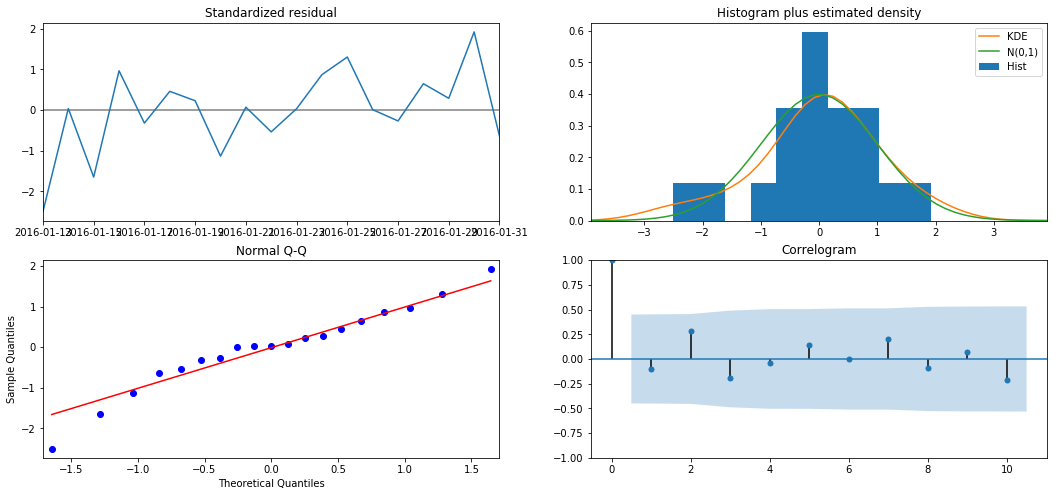

In [24]:
results.plot_diagnostics(figsize=(18, 8))
plt.show()

In [25]:
pd.plotting.register_matplotlib_converters()

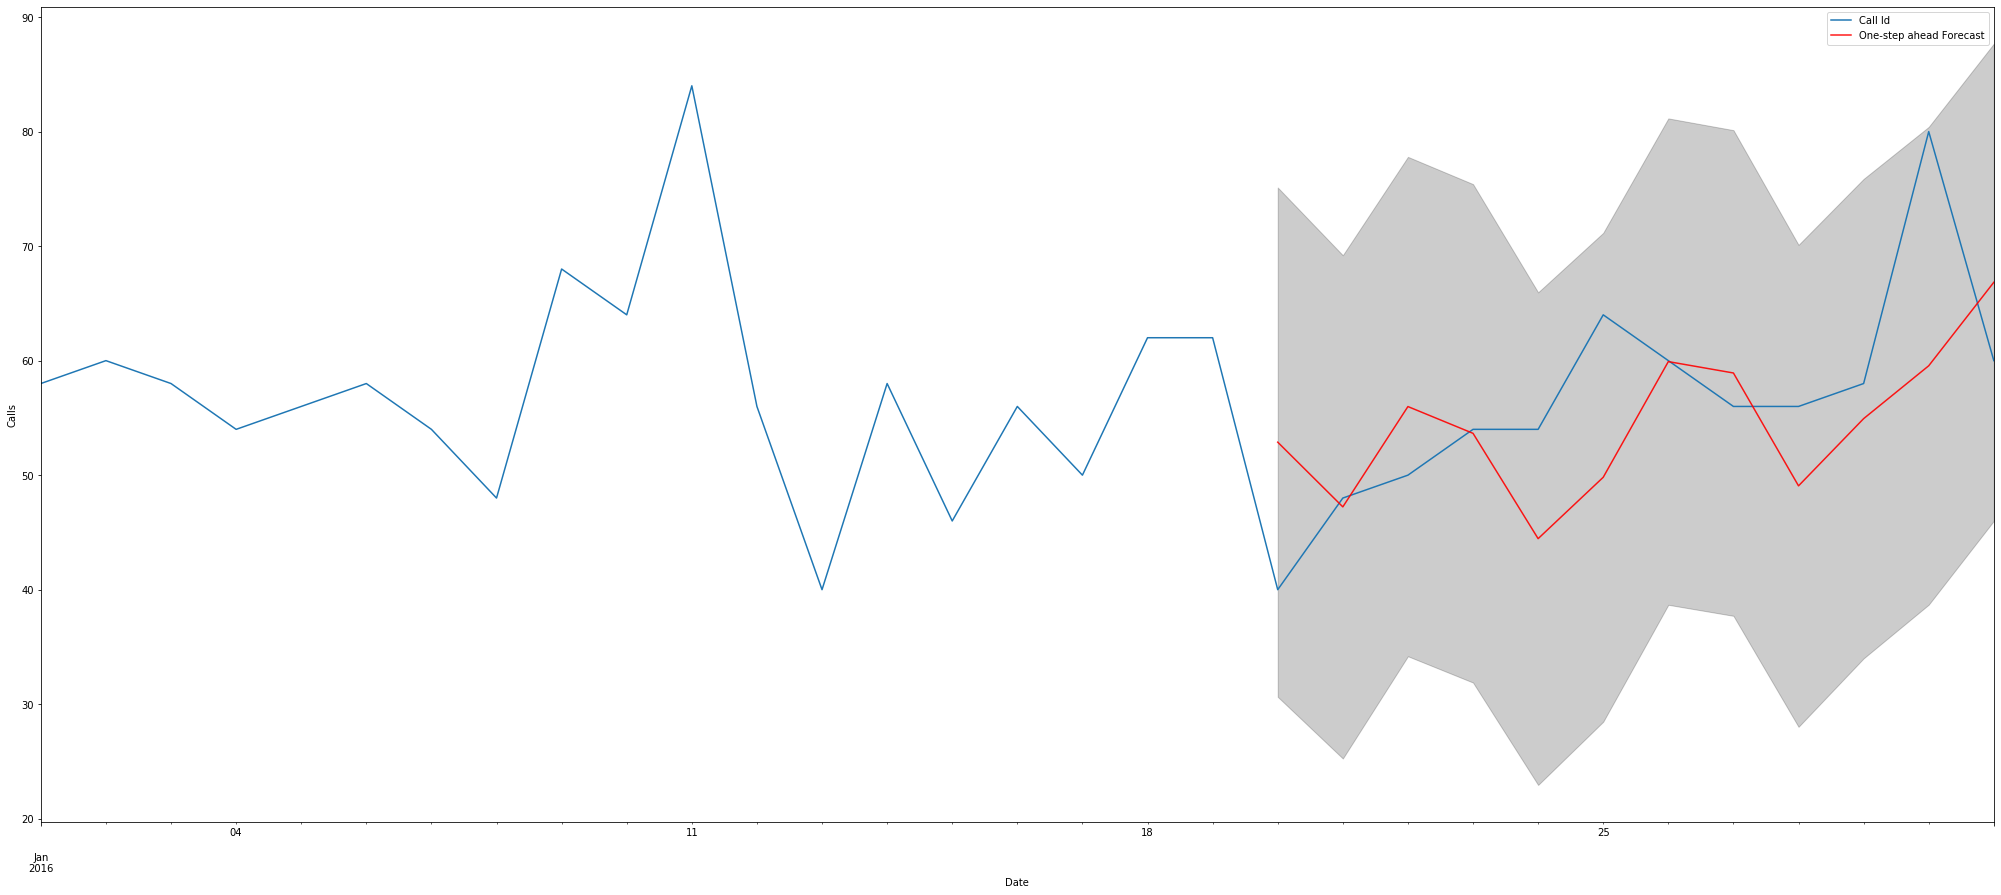

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2016-01-20'), dynamic=False)
pred_ci = pred.conf_int()
ax = daily.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.9, figsize=(35, 15), color='red')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Calls')
plt.legend()
plt.show()

In [27]:
y_forecasted = pred.predicted_mean
print(y_forecasted)
print(type(y_forecasted))

Date
2016-01-20    52.880840
2016-01-21    47.230814
2016-01-22    55.990137
2016-01-23    53.651994
2016-01-24    44.456150
2016-01-25    49.814783
2016-01-26    59.915962
2016-01-27    58.921561
2016-01-28    49.065882
2016-01-29    54.934933
2016-01-30    59.550984
2016-01-31    66.842833
Freq: D, dtype: float64
<class 'pandas.core.series.Series'>


In [28]:
print(daily['2016-01-20':])
print(type(daily['2016-01-20':]))

            Call Id
Date               
2016-01-20       40
2016-01-21       48
2016-01-22       50
2016-01-23       54
2016-01-24       54
2016-01-25       64
2016-01-26       60
2016-01-27       56
2016-01-28       56
2016-01-29       58
2016-01-30       80
2016-01-31       60
<class 'pandas.core.frame.DataFrame'>


In [29]:
l = [40,48,50,54,54,64,60,56,56,58,80,60]
s = pd.Series(l)

In [30]:
l2 = [52.880840,47.230814,55.990137,53.651994,44.456150,49.814783,59.915962,58.921561,49.065882,54.934933,59.550984,66.842833]
s2 = pd.Series(l2)

In [31]:
mse = ((s2 - s) ** 2).mean() 
print('The Mean Squared Error is {}'.format(round(mse, 2)))

The Mean Squared Error is 85.49


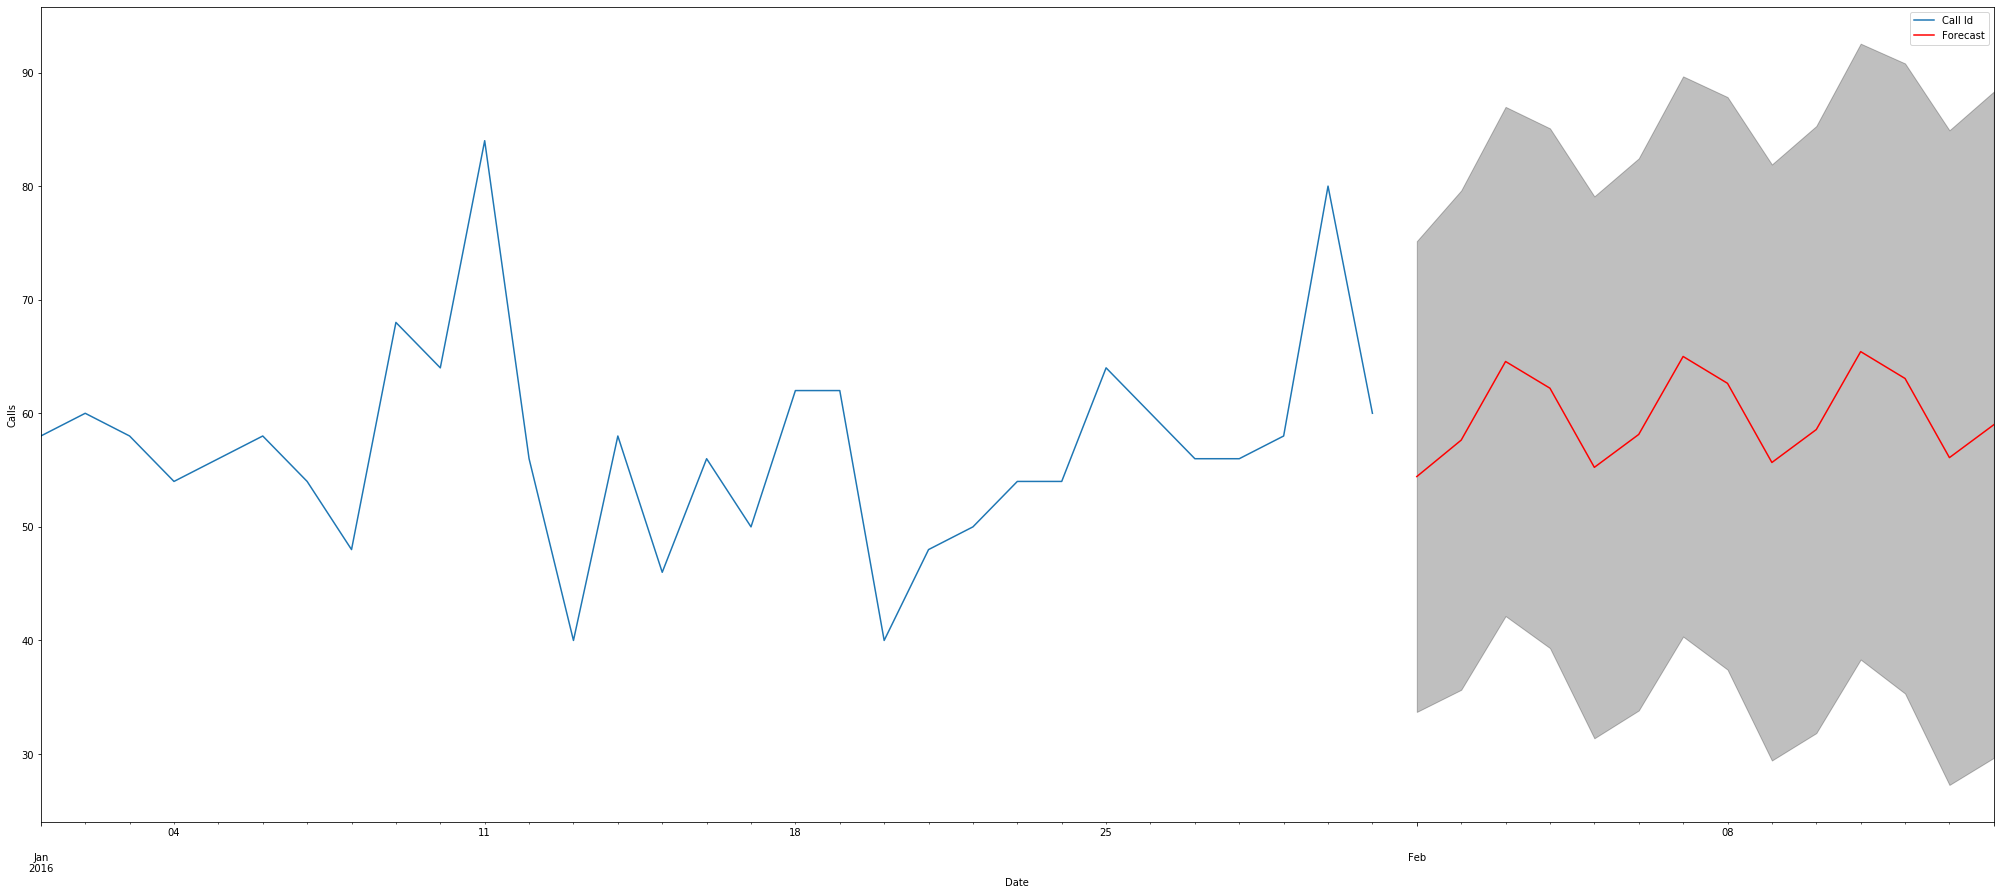

In [32]:
pred_uc = results.get_forecast(steps=14)
pred_ci = pred_uc.conf_int()
ax = daily.plot(label='observed', figsize=(35, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', color='red')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Calls')
plt.legend()
plt.show()

In [33]:
y_forecasted = pred.predicted_mean
y_forecasted.head(12)

Date
2016-01-20    52.880840
2016-01-21    47.230814
2016-01-22    55.990137
2016-01-23    53.651994
2016-01-24    44.456150
2016-01-25    49.814783
2016-01-26    59.915962
2016-01-27    58.921561
2016-01-28    49.065882
2016-01-29    54.934933
2016-01-30    59.550984
2016-01-31    66.842833
Freq: D, dtype: float64

In [34]:
y_truth = daily['2016-01-20':] 
y_truth.head(12)

,Call Id
Date,
2016-01-20,40
2016-01-21,48
2016-01-22,50
2016-01-23,54
2016-01-24,54
2016-01-25,64
2016-01-26,60
2016-01-27,56
2016-01-28,56


In [35]:
pred_ci.head(14)

,lower Call Id,upper Call Id
2016-02-01,33.705792,75.152809
2016-02-02,35.655154,79.618677
2016-02-03,42.144109,86.975863
2016-02-04,39.328048,85.085269
2016-02-05,31.384474,79.096377
2016-02-06,33.833992,82.442042
2016-02-07,40.341764,89.661673
2016-02-08,37.432741,87.841302
2016-02-09,29.429695,81.907529
2016-02-10,31.841481,85.290092


In [36]:
forecast = round(pred_uc.predicted_mean,2)
forecast.head(14)

2016-02-01    54.43
2016-02-02    57.64
2016-02-03    64.56
2016-02-04    62.21
2016-02-05    55.24
2016-02-06    58.14
2016-02-07    65.00
2016-02-08    62.64
2016-02-09    55.67
2016-02-10    58.57
2016-02-11    65.43
2016-02-12    63.06
2016-02-13    56.10
2016-02-14    58.99
Freq: D, dtype: float64

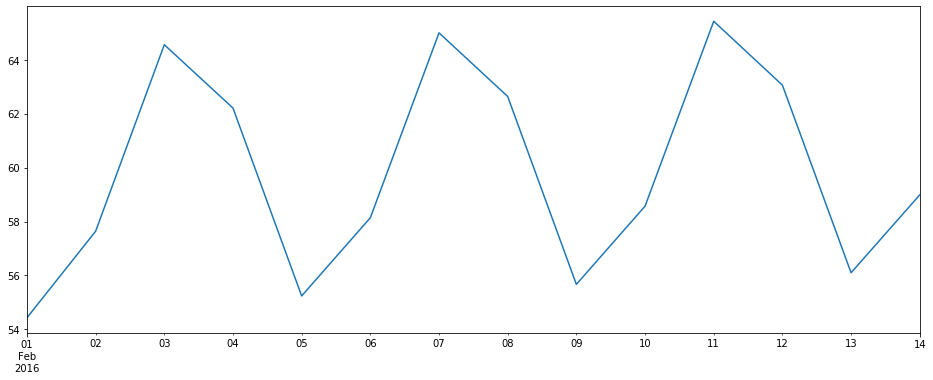

In [37]:
forecast.plot(figsize=(16, 6)) # 03.02.2016 = wednesday, 05.02.2016 = friday, 07.02.2016 = sunday, 09.02.2016 = tuesday

In [38]:
# hourly data
hour = data.set_index('Date').groupby(pd.Grouper(freq='H')).count()

In [39]:
hour['Weekday'] = hour.index.weekday_name

In [40]:
hour

,Call Id,Weekday
Date,,
2016-01-01 09:00:00,4,Friday
2016-01-01 10:00:00,4,Friday
2016-01-01 11:00:00,10,Friday
2016-01-01 12:00:00,12,Friday
2016-01-01 13:00:00,8,Friday
...,...,...
2016-01-31 13:00:00,0,Sunday
2016-01-31 14:00:00,8,Sunday
2016-01-31 15:00:00,8,Sunday


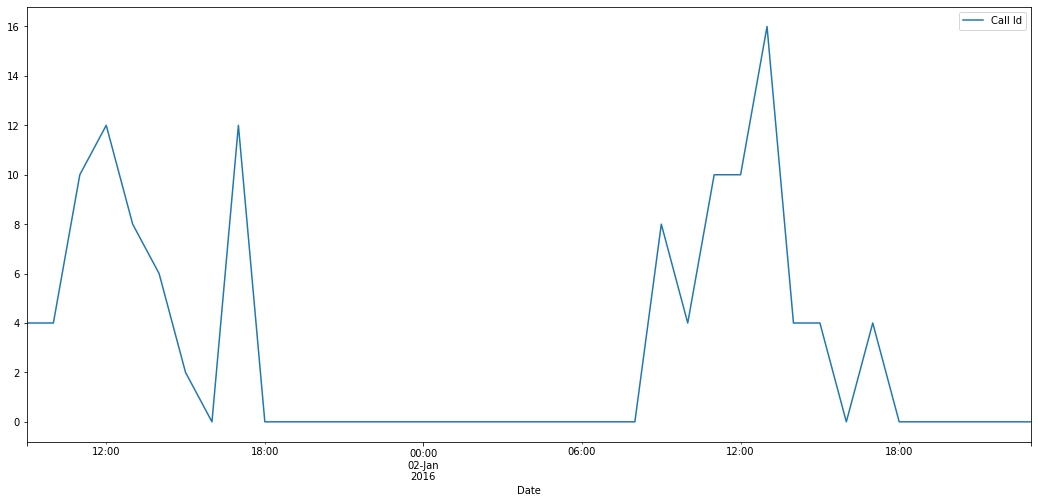

In [50]:
hour['2016-01-01':'2016-01-02'].plot()

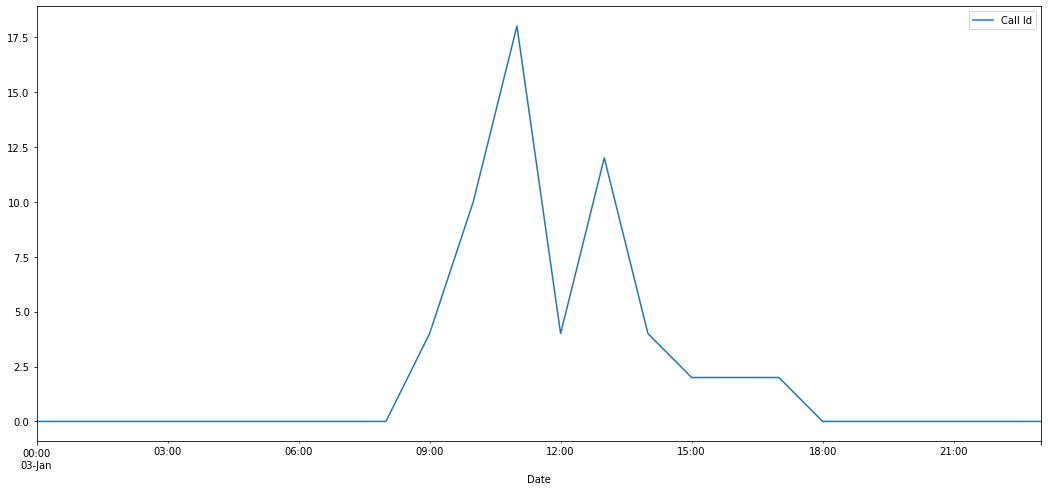

In [51]:
hour['2016-01-03'].plot()